In [3]:
import pandas as pd

In [4]:
train = pd.read_csv('train.csv')

In [5]:
train.shape

(14993, 24)

In [6]:
train.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

In [9]:
from IPython.display import display

with pd.option_context('display.max_columns',999):
    display(train.head())

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [12]:
breed_labels = pd.read_csv('breed_labels.csv')
color_labels = pd.read_csv('color_labels.csv')
state_labels = pd.read_csv('state_labels.csv')

In [15]:
easy_cols = ['Name', 'Description', 'PhotoAmt', 'Gender', 'Quantity', 'Fee', 'VideoAmt', 'AdoptionSpeed']
train[easy_cols].head()

,Name,Description,PhotoAmt,Gender,Quantity,Fee,VideoAmt,AdoptionSpeed
0,Nibble,Nibble is a 3+ month old ball of cuteness. He ...,1.0,1,1,100,0,2
1,No Name Yet,I just found it alone yesterday near my apartm...,2.0,1,1,0,0,0
2,Brisco,Their pregnant mother was dumped by her irresp...,7.0,1,1,0,0,3
3,Miko,"Good guard dog, very alert, active, obedience ...",8.0,2,1,150,0,2
4,Hunter,This handsome yet cute boy is up for adoption....,3.0,1,1,0,0,2


In [26]:
train.sample(15)['Name'].str.strip()

14185                  Elsa And Belle
570                            Stripe
4155                            Bobot
8386                   Mamme In Kulim
10357            Spunky Calico Kitten
14455                       Mr.Biggle
120                               NaN
7223                            Nivea
11484                           Snowy
3702                Puppy Squad Goals
9312                            ROMEO
360                 Golden Short Tail
6101                           Cherry
419                         Choco Pop
978      Uban, Orange, Belang, Langak
Name: Name, dtype: object

In [28]:
with pd.option_context('display.max_colwidth',999):
    display(train.sample(5)['Description'].str.strip())

11803    Sorry i don't have their photo.. I want to give away this cat because i cannot keep them anymore. My mom always say please give them away.. I so sad to give them away i hope there are pet lover who want to care my cat. I don't want their from far away i just want from Taman Lestari Putra (LEP)4-7. I can C.O.D to your house but i need 2 days cause on the first day i want to go and see where is your house were.. and the second day i will send to your house.. Who want my cat please contact me on-Nadira THANK YOU Reason: 1. I want to go to your house everyday to see my cat. 2.I want to see you can keep it right or not..
9455                                                                                                                                                                                                                                                                                                                                                                           

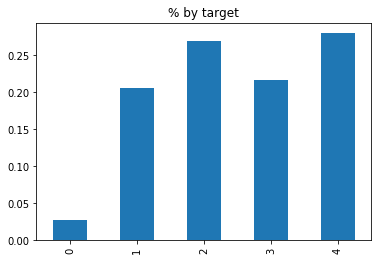

In [52]:
import seaborn as sns

(train['AdoptionSpeed'].value_counts() / float(train['AdoptionSpeed'].count())).sort_index().plot(kind='bar').set_title('% by target');

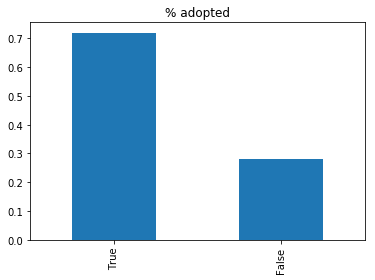

In [51]:
((train['AdoptionSpeed'] < 4).value_counts() / train['AdoptionSpeed'].count()).plot(kind='bar').set_title('% adopted');

A little over a quarter of pets were unadopted after 100 days, but thankfully about 70% were adopted before then!

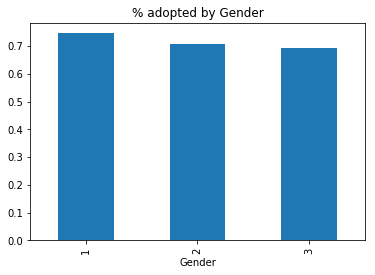

In [58]:
train.groupby('Gender').apply(lambda df: (df['AdoptionSpeed'] < 4).mean()).plot(kind='bar').set_title('% adopted by Gender');

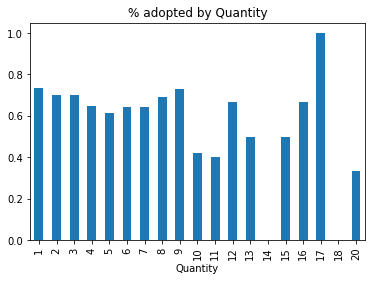

In [57]:
train.groupby('Quantity').apply(lambda df: (df['AdoptionSpeed'] < 4).mean()).plot(kind='bar').set_title('% adopted by Quantity');

Adoption rate seems mostly unrelated to group size -- but do larger groups get fully adopted later?

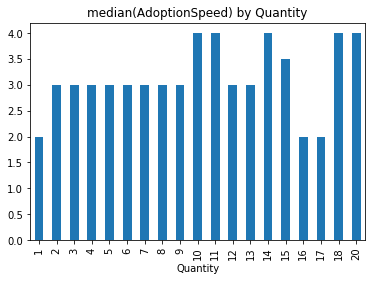

In [63]:
train.groupby('Quantity').apply(lambda df: (df['AdoptionSpeed']).median()).plot(kind='bar').set_title('median(AdoptionSpeed) by Quantity');

It does generally take longer for larger groups to get adopted -- although most of the difference bis between being a group or not. Groups on average tend to be adopted in the first quarter, whereas single animals are typically adopted in the first month.

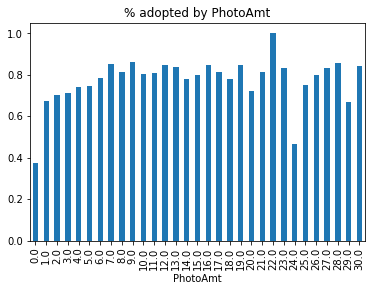

In [69]:
train.groupby('PhotoAmt').apply(lambda df: (df['AdoptionSpeed'] < 4).mean()).plot(kind='bar').set_title('% adopted by PhotoAmt');

Having at least one photo is really important -- 40% vs. 60+% eventual adoption rate!

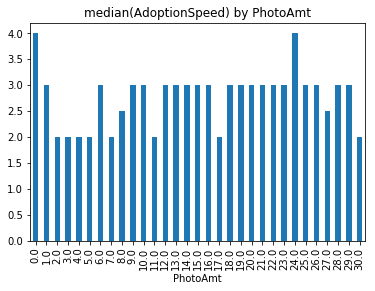

In [68]:
train.groupby('PhotoAmt').apply(lambda df: (df['AdoptionSpeed']).median()).plot(kind='bar').set_title('median(AdoptionSpeed) by PhotoAmt');

But more than 2 or 3 photos is overkill.

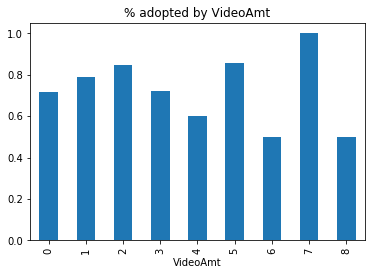

In [67]:
train.groupby('VideoAmt').apply(lambda df: (df['AdoptionSpeed'] < 4).mean()).plot(kind='bar').set_title('% adopted by VideoAmt');

Having a video isn't really that important -- and presumably is on top of photos for the most part.

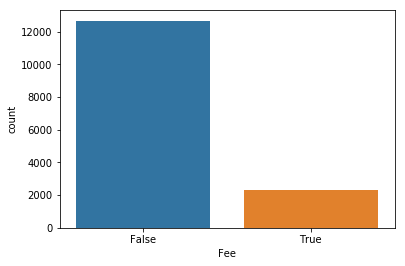

In [83]:
sns.countplot(train.Fee > 0);

Most listings have no Fee.

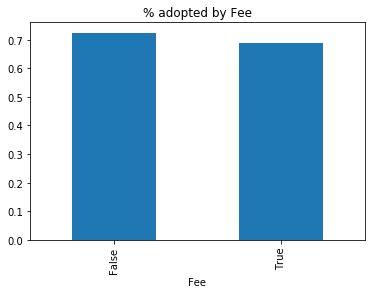

In [85]:
train.groupby(train.Fee > 0).apply(lambda df: (df['AdoptionSpeed'] < 4).mean()).plot(kind='bar').set_title('% adopted by Fee');

There isn't any difference in eventual adoption by whether it has a Fee or not.

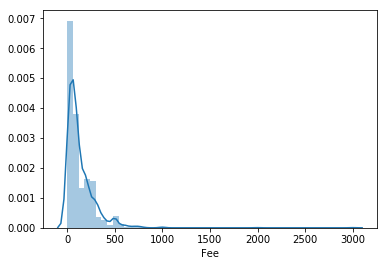

In [91]:
sns.distplot(train.Fee.loc[train.Fee > 0])

\$500 seems to be about the limit for fees.